### <h3 style="color: #ADD8E6;">Complementaria 4: Manejo de datos y análisis preliminar en Python</h3>

El objetivo de esta complementaria es aprender a procesar datos en Python, desde importar y exportar archivos, hasta el manejo interno de datos y el ajuste de distribuciones.

<h3 style="color: #ADD8E6;">Importar archivos de datos
</h3>

Para importar archivos de datos de extensión csv, txt, xlsx, dta o sas, podemos utilizar la librería `pandas`.

A continuación, queremos importar la base de datos “AAPL.csv” que se encuentra en Bloque Neón. Para esto, usaremos la función `pd.read_csv()`. Antes de ejecutar el código para importar el archivo, debe establecer el directorio de trabajo (Working Directory) en la ruta en la que se encuentra el archivo en su computador. (P. ej. “C://Desktop/Modelos 202510/Complementarias/Complementaria 4/AAPL.csv”) utilizando el módulo `os`.

In [1]:
import os
import pandas as pd

#Conocer el directorio de trabajo actual
directorio_actual = os.getcwd()
#print(directorio_actual)

#Si se quiere cambiar el directorio
'''os.chdir('/ruta/del/nuevo/directorio')'''

df = pd.read_csv('AAPL.csv')
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-07-17,148.820007,150.899994,148.570007,149.559998,148.974976,23793500
1,2017-07-18,149.199997,150.130005,148.669998,150.080002,149.492950,17868800
2,2017-07-19,150.479996,151.419998,149.949997,151.020004,150.429276,20923000
3,2017-07-20,151.500000,151.740005,150.190002,150.339996,149.751923,17243700
4,2017-07-21,149.990005,150.440002,148.880005,150.270004,149.682205,26252600


La base de datos “AAPL.csv” incluye la información de las acciones de Apple para los meses de julio y agosto del año 2017. Para cada fecha se conoce el precio al que abrió la acción ese día, los valores máximo y mínimo del precio, el precio de cierre de la acción, el precio ajustado y, finalmente, el volumen de acciones transado. De esta misma manera se pueden importar datos de archivos con diferente extensión (`pd.read_excel()`, `pd.read_stata()`, por ejemplo).

*Nota:* Para conocer el directorio actual dónde se está trabajando en Python se puede utilizar la función `getcwd()` del módulo `os`. Si se desea cambiar el directorio de trabajo se puede usar la función chdir() ingresando como parámetro la dirección que se quiere asignar, por ejemplo:
`os.chdir("C:Desktop/Modelos 202510/Complementarias/Complementaria 4").`

<h3 style="color: #ADD8E6;">DataFrame
</h3>

Cuando importamos los datos utilizando la librería de `pandas` estos se almacenan en estructura de DataFrame. Un DataFrame es útil porque podemos almacenar vectores de diferente tipo (por ejemplo, numéricos y caracteres). También es útil porque podemos acceder a la información de cierta columna, conociendo el número de la columna o el nombre que le asignamos a dicha columna. La línea superior del DataFrame, llamada el encabezado, contiene los nombres de columna. Cada línea horizontal denota una fila de datos, que comienza con el nombre de la fila y, a continuación, los datos.

Para llamar los datos de una celda se pueden utilizar dos métodos diferentes:
* iloc[]: Utiliza índices numéricos (enteros) para acceder a las filas y las columnas.
* loc[]: Utiliza etiquetas de fila y nombres de columnas para acceder a los datos.

Para llamar los datos de una celda utilizando `iloc[]` introducimos sus coordenadas de fila y columna (como números enteros) en el operador de corchetes [ ]. Las dos coordenadas están separadas por una coma [numero de fila, numero de columna]. Por ejemplo, queremos traer el dato que se encuentra en la fila 3 y columna 4 (recuerde que los índices en Python empiezan en 0, por lo que en este caso se debe usar el índice 2 para las filas y el 3 para las columnas).

In [2]:
df.iloc[2,3]

np.float64(149.949997)

Para llamar los datos de una celda utilizando `loc[]` introducimos la etiqueta de la fila (si no tiene etiqueta es directamente el número de fila) y el nombre de la columna en el operador de corchetes [ ].

In [3]:
df.loc[2,'Low']

np.float64(149.949997)

De igual forma, podemos conocer el número de filas y columnas de un DataFrame con las función `shape`. Esta función guarda las dimensiones del DataFrame en una tupla, en donde el primer elemento corresponde al número de filas y el segundo almacena el número de columnas.

In [4]:
df.shape

(21, 7)

In [5]:
num_filas = df.shape[0]
print(f'El DataFrame tiene {df.shape[0]} filas.')

El DataFrame tiene 21 filas.


In [6]:
num_columnas = df.shape[1]
print(f'El DataFrame tiene {df.shape[1]} columnas.')

El DataFrame tiene 7 columnas.


Más aún, podemos acceder a la información básica del DataFrame utilizando la función `describe()`:

In [7]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,21.000000,21.000000,21.000000,21.000000,21.000000,2.100000e+01
mean,153.880954,154.989048,152.591431,153.814287,153.300663,2.657169e+07
std,4.053136,4.252413,3.980617,4.047153,4.122180,1.205136e+07
min,148.820007,150.130005,147.300003,148.729996,148.148224,1.578100e+07
25%,149.990005,150.899994,148.880005,150.270004,149.682205,1.984590e+07
50%,153.350006,153.929993,151.800003,152.740005,152.142548,2.202820e+07
75%,157.059998,158.919998,156.070007,157.139999,156.525330,2.709730e+07
max,159.899994,161.830002,159.110001,161.059998,160.429993,6.993680e+07


Allí encontramos las estadísticas básicas de variables numéricas (media, cuartiles, desviación, mínimo y máximo) para cada columna dentro del DataFrame.

Para acceder a una columna podemos hacerlo de varias formas:
1. Utilizando el nombre de la columna.
2. Utilizando el atributo de columna.
3. Utilizando la función `loc[]`.
4. Utilizando la función `iloc[]`.

In [8]:
df['Volume']

0     23793500
1     17868800
2     20923000
3     17243700
4     26252600
5     21493200
6     18853900
7     15781000
8     32476300
9     17213700
10    19845900
11    35368600
12    69936800
13    27097300
14    20559900
15    21870300
16    36205900
17    26131500
18    40804300
19    26257100
20    22028200
Name: Volume, dtype: int64

In [9]:
# Para este método el nombre de la columna no puede tener espacios ni caracteres especiales
df.Volume

0     23793500
1     17868800
2     20923000
3     17243700
4     26252600
5     21493200
6     18853900
7     15781000
8     32476300
9     17213700
10    19845900
11    35368600
12    69936800
13    27097300
14    20559900
15    21870300
16    36205900
17    26131500
18    40804300
19    26257100
20    22028200
Name: Volume, dtype: int64

In [10]:
df.loc[:,'Volume']

0     23793500
1     17868800
2     20923000
3     17243700
4     26252600
5     21493200
6     18853900
7     15781000
8     32476300
9     17213700
10    19845900
11    35368600
12    69936800
13    27097300
14    20559900
15    21870300
16    36205900
17    26131500
18    40804300
19    26257100
20    22028200
Name: Volume, dtype: int64

In [11]:
df.iloc[:,6]

0     23793500
1     17868800
2     20923000
3     17243700
4     26252600
5     21493200
6     18853900
7     15781000
8     32476300
9     17213700
10    19845900
11    35368600
12    69936800
13    27097300
14    20559900
15    21870300
16    36205900
17    26131500
18    40804300
19    26257100
20    22028200
Name: Volume, dtype: int64

Si se quiere acceder a múltiples columnas simultáneamente se puede hacer uso del doble corchete [[]].

In [12]:
df[['High','Volume']]

,High,Volume
0,150.899994,23793500
1,150.130005,17868800
2,151.419998,20923000
3,151.740005,17243700
4,150.440002,26252600
5,152.440002,21493200
6,153.839996,18853900
7,153.929993,15781000
8,153.990005,32476300
9,150.229996,17213700


También, podemos acceder a la información de las filas de diferentes formas:

In [13]:
df.iloc[2,]

Date         2017-07-19
Open         150.479996
High         151.419998
Low          149.949997
Close        151.020004
Adj Close    150.429276
Volume         20923000
Name: 2, dtype: object

In [14]:
'''df.loc['Nombre de la fila',]'''

"df.loc['Nombre de la fila',]"

Podemos traer información de múltiples filas o columnas. En este caso queremos traer la información de las filas 5 y 12 al mismo tiempo:

In [15]:
df.iloc[[4,11]]

,Date,Open,High,Low,Close,Adj Close,Volume
4,2017-07-21,149.990005,150.440002,148.880005,150.270004,149.682205,26252600
11,2017-08-01,149.100006,150.220001,148.410004,150.050003,149.463058,35368600


Por último, es posible obtener un subconjunto de filas dentro del data frame que cumplan cierta condición haciendo uso de arreglos de operadores lógicos.

Cuando solo se tiene una condición:

In [16]:
df[df['Adj Close']>150]

,Date,Open,High,Low,Close,Adj Close,Volume
2,2017-07-19,150.479996,151.419998,149.949997,151.020004,150.429276,20923000
5,2017-07-24,150.580002,152.440002,149.899994,152.089996,151.495071,21493200
6,2017-07-25,151.800003,153.839996,151.800003,152.740005,152.142548,18853900
7,2017-07-26,153.350006,153.929993,153.059998,153.460007,152.859726,15781000
12,2017-08-02,159.279999,159.750000,156.160004,157.139999,156.525330,69936800
13,2017-08-03,157.050003,157.210007,155.020004,155.570007,154.961472,27097300
14,2017-08-04,156.070007,157.399994,155.690002,156.389999,155.778259,20559900
15,2017-08-07,157.059998,158.919998,156.669998,158.809998,158.188797,21870300
16,2017-08-08,158.600006,161.830002,158.270004,160.080002,159.453827,36205900
17,2017-08-09,159.259995,161.270004,159.110001,161.059998,160.429993,26131500


Cuando se tienen múltiples condiciones:

In [17]:
df[(df['Adj Close']>150) & (df['Low']<150)]

,Date,Open,High,Low,Close,Adj Close,Volume
2,2017-07-19,150.479996,151.419998,149.949997,151.020004,150.429276,20923000
5,2017-07-24,150.580002,152.440002,149.899994,152.089996,151.495071,21493200


Ahora bien, también podemos añadir columnas a un DataFrame. Por ejemplo, podemos crear una columna, `LogAdj`, que sea el logaritmo del precio ajustado de cierre:

In [18]:
import numpy as np
df['LogAdj'] = np.log10(df['Adj Close'])
df

,Date,Open,High,Low,Close,Adj Close,Volume,LogAdj
0,2017-07-17,148.820007,150.899994,148.570007,149.559998,148.974976,23793500,2.173113
1,2017-07-18,149.199997,150.130005,148.669998,150.080002,149.492950,17868800,2.174621
2,2017-07-19,150.479996,151.419998,149.949997,151.020004,150.429276,20923000,2.177332
3,2017-07-20,151.500000,151.740005,150.190002,150.339996,149.751923,17243700,2.175372
4,2017-07-21,149.990005,150.440002,148.880005,150.270004,149.682205,26252600,2.175170
5,2017-07-24,150.580002,152.440002,149.899994,152.089996,151.495071,21493200,2.180399
6,2017-07-25,151.800003,153.839996,151.800003,152.740005,152.142548,18853900,2.182251
7,2017-07-26,153.350006,153.929993,153.059998,153.460007,152.859726,15781000,2.184293
8,2017-07-27,153.750000,153.990005,147.300003,150.559998,149.971069,32476300,2.176007
9,2017-07-28,149.889999,150.229996,149.190002,149.500000,148.915207,17213700,2.172939


Para eliminar una columna de nuestro DataFrame usamos el siguiente código:

In [19]:
df = df.drop(columns=['LogAdj'])
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-07-17,148.820007,150.899994,148.570007,149.559998,148.974976,23793500
1,2017-07-18,149.199997,150.130005,148.669998,150.080002,149.492950,17868800
2,2017-07-19,150.479996,151.419998,149.949997,151.020004,150.429276,20923000
3,2017-07-20,151.500000,151.740005,150.190002,150.339996,149.751923,17243700
4,2017-07-21,149.990005,150.440002,148.880005,150.270004,149.682205,26252600
5,2017-07-24,150.580002,152.440002,149.899994,152.089996,151.495071,21493200
6,2017-07-25,151.800003,153.839996,151.800003,152.740005,152.142548,18853900
7,2017-07-26,153.350006,153.929993,153.059998,153.460007,152.859726,15781000
8,2017-07-27,153.750000,153.990005,147.300003,150.559998,149.971069,32476300
9,2017-07-28,149.889999,150.229996,149.190002,149.500000,148.915207,17213700


<h3 style="color: #ADD8E6;">Gráficas
</h3>

Podemos utilizar gráficas para hacer exploración de datos dentro del DataFrame. Por ejemplo, utilizando la función `plot()` de la librería `matplotlib` creamos un histograma de una variable de interés.

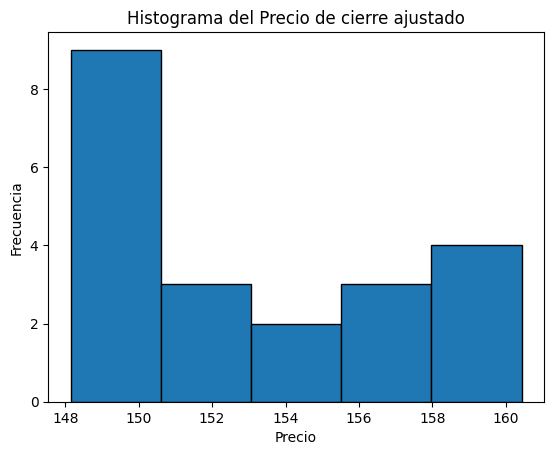

In [20]:
import matplotlib.pyplot as plt

# Crear un histograma de la columna 'Adj Close'
df['Adj Close'].plot(kind='hist', bins=5, edgecolor='black')

# Añadir títulos y etiquetas
plt.title('Histograma del Precio de cierre ajustado')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

También podemos hacer gráficos de dispersión, en este caso queremos crear un gráfico de dispersión de los precios de cierre versus los precios máximos.

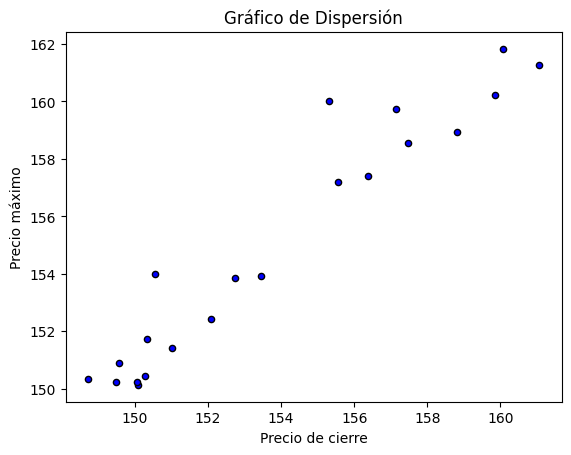

In [21]:
# Crear un gráfico de dispersión
df.plot(kind='scatter', x='Close', y='High', color='blue', edgecolor='black')

# Añadir títulos y etiquetas
plt.title('Gráfico de Dispersión')
plt.xlabel('Precio de cierre')
plt.ylabel('Precio máximo')

plt.show()

<h3 style="color: #ADD8E6;">Ajuste de distribuciones
</h3>

Para realizar un ajuste de datos a una distribución de probabilidad se puede utilizar la librería de `scipy` con el módulo `stats` y se debe tener una intuición sobre la naturaleza de los datos (continuos o discretos).

<h4 style="color: #ADD8E6;">Ajuste de distribuciones continuas
</h3>

Algunas de las distribuciones continuas son: exponencial, Gamma, Weibull, normal, lognormal, uniforme, entre otras. Para conocer si un vector de datos se ajusta a alguna de estas distribuciones puede utilizar la librería de `scipy`. Suponga que el vector `tClientes` contiene el tiempo entre llegadas de clientes a una tienda. Primero, creamos 300 realizaciones de estos tiempos que seguirán una distribución exponencial con tasa 2 clientes por cualquier unidad de tiempo (p. ej. horas):

In [22]:
tClientes = np.random.exponential(scale=1/2, size=300)

Supongamos que no conocemos en un principio qué tipo de distribución siguen los datos del vector `tClientes`. De esta manera, primero haremos un histograma para ver si los datos se comportan de acuerdo a una distribución conocida.

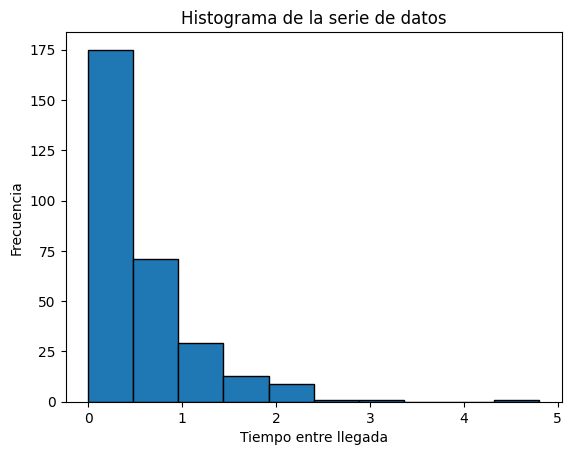

In [23]:
plt.hist(tClientes, edgecolor='black')

# Añadir títulos y etiquetas
plt.title('Histograma de la serie de datos')
plt.xlabel('Tiempo entre llegada')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

Podemos evidenciar que los datos tienen un comportamiento que se asemeja a la distribución exponencial. Por este motivo, con ayuda de la función ktest() vamos a realizar una prueba de bondad de ajuste por Kolmogorov-Smirnov utilizando la función `kstest()`. Esta recibe como parámetro la distribución que queremos probar. Siendo “expon” la distribución exponencial, "norm" la distribución normal, “gamma” la distribución gamma, etc.

In [24]:
from scipy import stats

# Prueba de Kolmogorov-Smirnov
ks_stat, ks_p_value = stats.kstest(tClientes, 'expon',args=(0,1/2))

print('Estadístico de KS:', ks_stat)
print('P-value:', ks_p_value)
print('Tasa estimada:', 1/(np.mean(tClientes)))

Estadístico de KS: 0.06757790865099
P-value: 0.12331707428606553
Tasa estimada: 1.7998278910138512


Como pudimos observar, se obtuvo un p-value mayor a 0.05, lo cual nos indica que con una significancia del 5% no rechazamos la hipótesis nula y nuestros datos siguen la distribución exponencial.

Adicionalmente, podemos ver algunas gráficas de interés para la prueba de bondad de ajuste realizada.

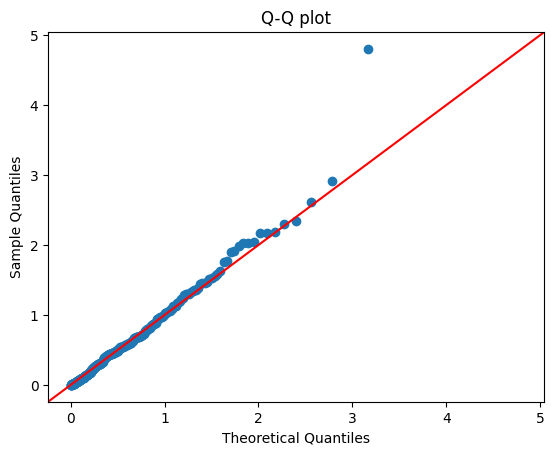

In [27]:
import statsmodels.api as sm

# Ajustar la distribución exponencial a los datos
loc, scale = stats.expon.fit(tClientes)

sm.qqplot(tClientes, dist=stats.expon, loc=loc, scale=scale, line='45')
plt.title('Q-Q plot')
plt.show()

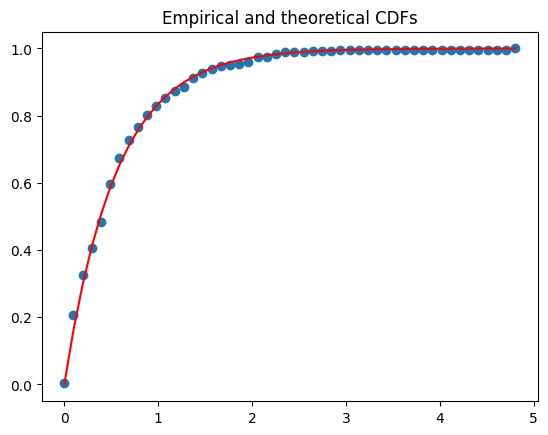

In [28]:
params = stats.expon.fit(tClientes)

# CDF empírica y teórica
ecdf = sm.distributions.ECDF(tClientes)
x = np.linspace(min(tClientes), max(tClientes))
y = ecdf(x)
plt.plot(x, y, marker='o', linestyle='none')
plt.plot(x, stats.expon.cdf(x, *params), 'r')
plt.title('Empirical and theoretical CDFs')
plt.show()

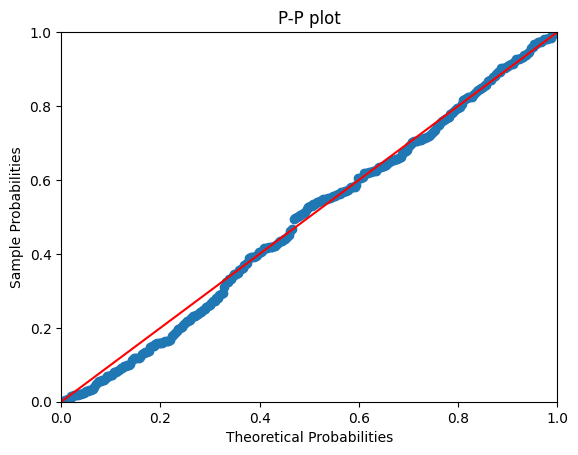

In [29]:
# P-P plot
pp_plot = sm.ProbPlot(tClientes, dist=stats.expon, fit=True)
pp_plot.ppplot(line='45')
plt.title('P-P plot')
plt.show()

<h4 style="color: #ADD8E6;">Ajuste de distribuciones discretas
</h3>

Algunas de las distribuciones discretas son: Poisson, geométrica, binomial, hipergeométrica y binomial negativa, entre otras. A continuación generamos un vector de datos que siguen una distribución Poisson con tasa de 3.

In [30]:
tasa = 3
x2 = np.random.poisson(tasa, 50)

Evaluamos si los datos siguen la distribución Poisson

In [31]:
from scipy.stats import poisson, chisquare

#Calcular la media de la muestra:
media = np.mean(x2)

#Calcular las frecuencias observadas:
valores, frecuencias_observadas = np.unique(x2, return_counts=True)

#Calcular las frecuencias esperadas:
frecuencias_esperadas = poisson.pmf(valores, media) * len(x2)

# Ajuste de las frecuencias esperadas para que sumen lo mismo que las observadas
frecuencias_esperadas = frecuencias_esperadas * frecuencias_observadas.sum() / frecuencias_esperadas.sum()

#Realizar prueba chi-cuadrado
estadistico_chi2, p_value = chisquare(frecuencias_observadas, frecuencias_esperadas)

print('Valor estadístico:', estadistico_chi2)
print('P-value:', p_value)


Valor estadístico: 6.361453362354766
P-value: 0.49823397451165086


Como pudimos observar, se obtuvo un p-value mayor a 0.05, lo cual nos indica que con una significancia del 5% no rechazamos la hipótesis nula y nuestros datos siguen la distribución Poisson.

<h3 style="color: #ADD8E6;">Ejercicios
</h3>

1. Utilizando el archivo de datos “AAPL.csv”, grafique un histograma del precio de cierre de la acción para los días martes y viernes.
2. Cree una nueva columna que contenga la diferencia entre el precio de apertura y cierre. Luego cree un subconjunto de datos en donde estén las 20 observaciones con mayor valor de la nueva variable.

Universidad de los Andes | Vigilada Mineducación. Reconocimiento como Universidad: Decreto 1297 del 30 de mayo de 1964. Reconocimiento personería jurídica: Resolución 28 del 23 de febrero de 1949 Minjusticia. Departamento de Ingeniería Industrial Carrera 1 Este No. 19 A 40 Bogotá, Colombia Tel. (57.1) 3324320 | (57.1) 3394949 Ext. 2880 /2881 http://industrial.uniandes.edu.co